# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units="metric"

# Define an empty list to fetch the weather data for each city
city_weather = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =(f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        lat = weather["coord"]["lat"]
        lng = weather["coord"]["lon"]
        max_temp =weather["main"]["temp_max"]
        humidity = weather["main"]["humidity"]
        clouds =  weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country =  weather["sys"]["country"]
        date = weather["dt"]

        
      
        
        
        city_weather.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maydanshakhr
Processing Record 2 of Set 1 | portland
Processing Record 3 of Set 1 | alesund
Processing Record 4 of Set 1 | tolanaro
Processing Record 5 of Set 1 | hammerfest
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | kyshtovka
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | puerto aysen
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | extrema
Processing Record 14 of Set 1 | stribro
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | sabang
Processing Record 17 of Set 1 | yaren
Processing Record 18 of Set 1 | kingston
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | al bardiyah
Processing Record 22 of Set 1 | katsuren-haebaru
Processing Re

Processing Record 42 of Set 4 | bonthe
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | san antonio de pale
Processing Record 45 of Set 4 | natal
Processing Record 46 of Set 4 | lata
Processing Record 47 of Set 4 | petropavlovsk-kamchatsky
Processing Record 48 of Set 4 | fale old settlement
Processing Record 49 of Set 4 | dolores
Processing Record 0 of Set 5 | mount pearl
Processing Record 1 of Set 5 | vadso
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | auki
Processing Record 4 of Set 5 | saratamata
City not found. Skipping...
Processing Record 5 of Set 5 | carnarvon
Processing Record 6 of Set 5 | crane
Processing Record 7 of Set 5 | andalgala
Processing Record 8 of Set 5 | kirensk
Processing Record 9 of Set 5 | yelizovo
Processing Record 10 of Set 5 | dalnegorsk
Processing Record 11 of Set 5 | chonchi
Processing Record 12 of Set 5 | mount gambier
Processing Record 13 of Set 5 | taman rajawali
City not found. Skipping...
Processing Re

Processing Record 32 of Set 8 | karaton
Processing Record 33 of Set 8 | wanxian
Processing Record 34 of Set 8 | cedar city
Processing Record 35 of Set 8 | bredasdorp
Processing Record 36 of Set 8 | alaghsas
Processing Record 37 of Set 8 | bani walid
Processing Record 38 of Set 8 | prince albert
Processing Record 39 of Set 8 | saint saviour
City not found. Skipping...
Processing Record 40 of Set 8 | selfoss
Processing Record 41 of Set 8 | guatire
Processing Record 42 of Set 8 | banda aceh
Processing Record 43 of Set 8 | pantai remis
Processing Record 44 of Set 8 | kiunga
Processing Record 45 of Set 8 | concepcion del uruguay
Processing Record 46 of Set 8 | al majaridah
Processing Record 47 of Set 8 | truro
Processing Record 48 of Set 8 | meadow lake
Processing Record 49 of Set 8 | babruysk
Processing Record 0 of Set 9 | matoury
Processing Record 1 of Set 9 | aromashevo
Processing Record 2 of Set 9 | saint-lazare
Processing Record 3 of Set 9 | flying fish cove
Processing Record 4 of Set 

Processing Record 19 of Set 12 | revda
Processing Record 20 of Set 12 | auriflama
Processing Record 21 of Set 12 | candido mendes
Processing Record 22 of Set 12 | toga village
City not found. Skipping...
Processing Record 23 of Set 12 | bhimunipatnam
Processing Record 24 of Set 12 | palu
Processing Record 25 of Set 12 | minas de marcona
Processing Record 26 of Set 12 | carangola
Processing Record 27 of Set 12 | margate
Processing Record 28 of Set 12 | pingxiang
Processing Record 29 of Set 12 | malvan
Processing Record 30 of Set 12 | hobyo
Processing Record 31 of Set 12 | mlimba
Processing Record 32 of Set 12 | impfondo
Processing Record 33 of Set 12 | san pedro
Processing Record 34 of Set 12 | kulhudhuffushi
Processing Record 35 of Set 12 | baijiantan
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_weather)

# Show Record Count
city_data_df.count()


City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,maydanshakhr,34.3956,68.8662,7.73,84,79,2.47,AF,1713617879
1,portland,45.5234,-122.6762,10.23,58,0,0.00,US,1713617437
2,alesund,62.4723,6.1549,7.17,45,40,6.69,NO,1713617880
3,tolanaro,-25.0319,46.9987,27.04,74,40,3.09,MG,1713617881
4,hammerfest,70.6634,23.6821,-2.75,63,0,4.63,NO,1713617882


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maydanshakhr,34.3956,68.8662,7.73,84,79,2.47,AF,1713617879
1,portland,45.5234,-122.6762,10.23,58,0,0.00,US,1713617437
2,alesund,62.4723,6.1549,7.17,45,40,6.69,NO,1713617880
3,tolanaro,-25.0319,46.9987,27.04,74,40,3.09,MG,1713617881
4,hammerfest,70.6634,23.6821,-2.75,63,0,4.63,NO,1713617882


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

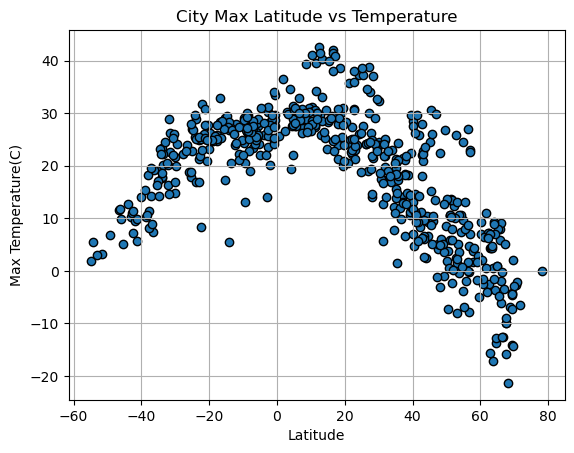

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",edgecolor = "black")
plt.grid()


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Max Latitude vs Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

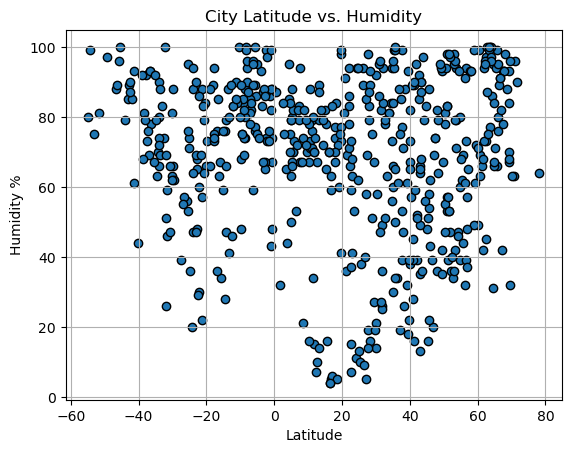

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor = "black")
plt.grid()
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

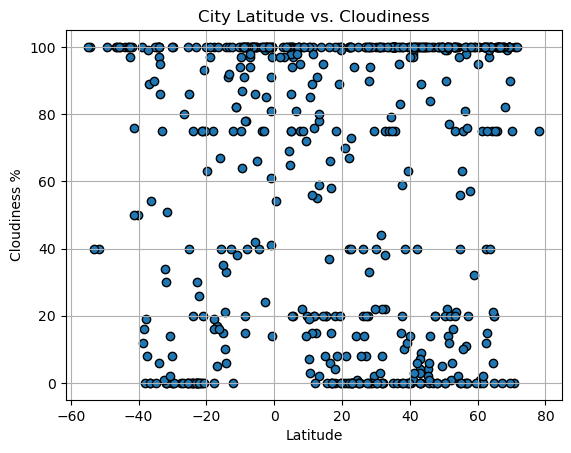

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor = "black")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs. Cloudiness")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

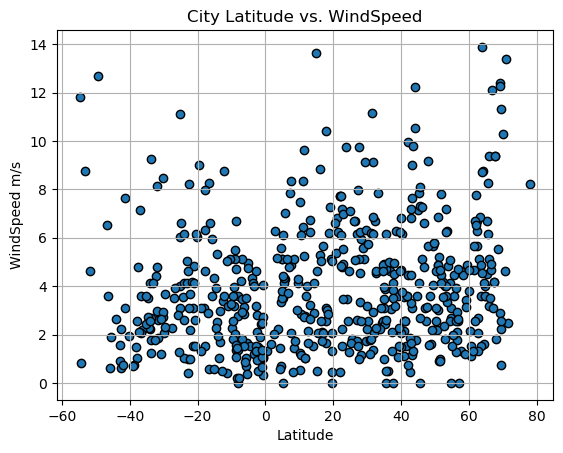

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor = "black")
plt.grid()
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("WindSpeed m/s")
plt.title(f"City Latitude vs. WindSpeed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, x_label, y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression = x_values * slope + intercept
    lineeq = f"y={round(slope,2)}x +{round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression,color="red")
    plt.annotate(lineeq,(x_values.iloc[0],y_values.iloc[0]),fontsize=15,c="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maydanshakhr,34.3956,68.8662,7.73,84,79,2.47,AF,1713617879
1,portland,45.5234,-122.6762,10.23,58,0,0.00,US,1713617437
2,alesund,62.4723,6.1549,7.17,45,40,6.69,NO,1713617880
4,hammerfest,70.6634,23.6821,-2.75,63,0,4.63,NO,1713617882
6,kyshtovka,56.5550,76.6271,4.63,73,100,1.79,RU,1713617883


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tolanaro,-25.0319,46.9987,27.04,74,40,3.09,MG,1713617881
5,grytviken,-54.2811,-36.5092,5.56,99,100,0.84,GS,1713617882
8,port-aux-francais,-49.3500,70.2167,6.77,97,100,12.69,TF,1713617884
9,hithadhoo,-0.6000,73.0833,29.59,67,100,0.31,MV,1713617885
10,puerto aysen,-45.4000,-72.7000,5.14,100,100,1.91,CL,1713617886


###  Temperature vs. Latitude Linear Regression Plot

The r value is 0.7053100074690621


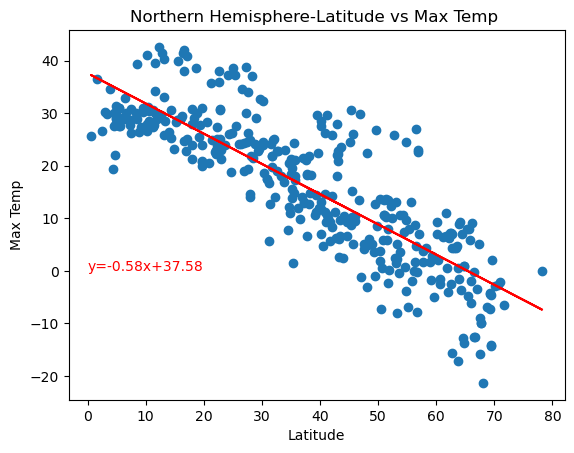

In [15]:
# Linear regression on Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

regression= northern_hemi_df["Lat"]*slope+intercept
lineeq=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],)
plt.plot(northern_hemi_df["Lat"],regression,color="red")
plt.annotate(lineeq,(0,0),c="red")
plt.title("Northern Hemisphere-Latitude vs Max Temp ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r value is {rvalue**2}")
plt.show()

The r value is 0.5466401396182887


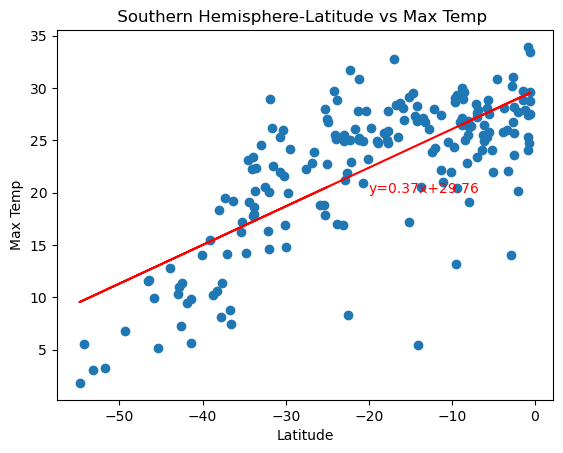

In [16]:
# Linear regression on Southern Hemisphere
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regression= southern_hemi_df["Lat"]*slope+intercept
lineeq=f"y={round(slope,2)}x+{round(intercept,2)}"
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regression,color="red")
plt.annotate(lineeq,(-20,20),c="red")
plt.title(" Southern Hemisphere-Latitude vs Max Temp  ")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r value is {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**  Northern Hemisphere:Temprature and latitude are negatively correlated.Both the factors are strongly correlated.

Southern Hemisphere:Temprature and latitude are Positively correlated.Both the factors are moderately correlated.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.024219382528681478


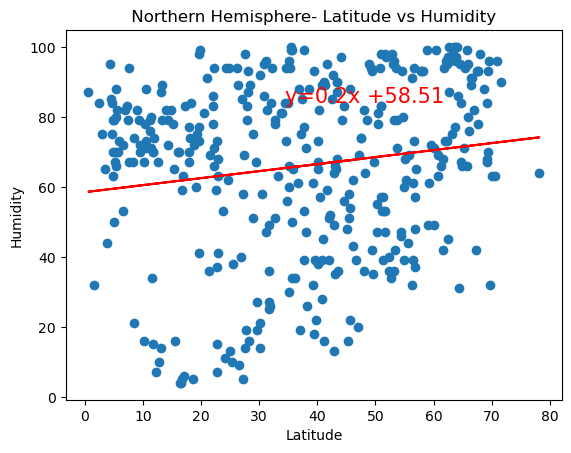

In [17]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"]," Northern Hemisphere- Latitude vs Humidity ","Latitude","Humidity")
#x_values, y_values, title, x_label, y_label

The r-value is: 0.003581434274693514


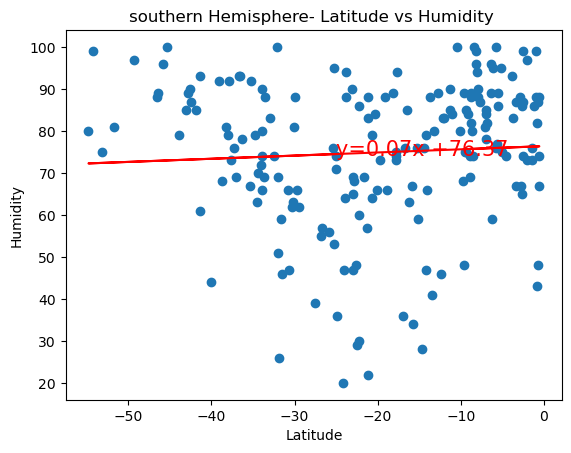

In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"southern Hemisphere- Latitude vs Humidity ","Latitude","Humidity")


**Discussion about the linear relationship:** Northern Hemisphere:There is no or very weak correlation between Latitude and Humidity
Southern Hemisphere:There is no or very weak correlation between Latitude and Humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004759518477996957


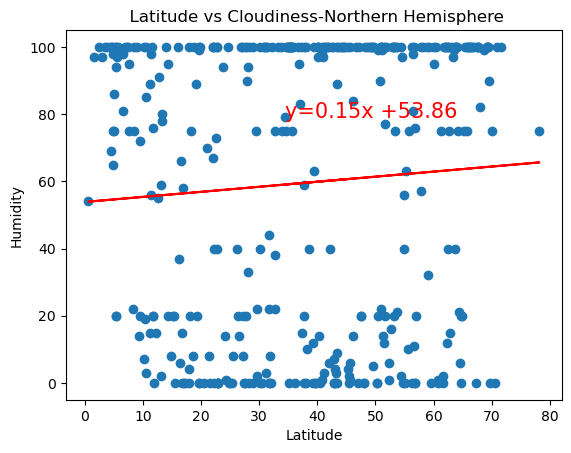

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"  Latitude vs Cloudiness-Northern Hemisphere ","Latitude","Humidity")
#x_values, y_values, title, x_label, y_label

The r-value is: 0.04531747716746277


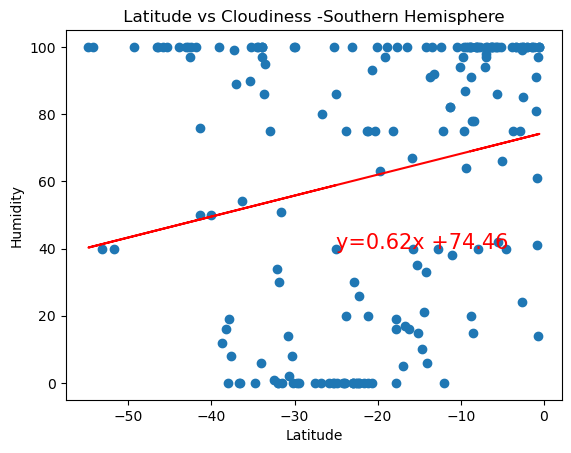

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"]," Latitude vs Cloudiness -Southern Hemisphere ","Latitude","Humidity")
#x_values, y_values, title, x_label, y_label

**Discussion about the linear relationship:**
Northern Hemisphere:There is no or very weak correlation between Latitude and Cloudiness
Southern Hemisphere:There is no or very weak correlation between Latitude and Cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.013118545302933129


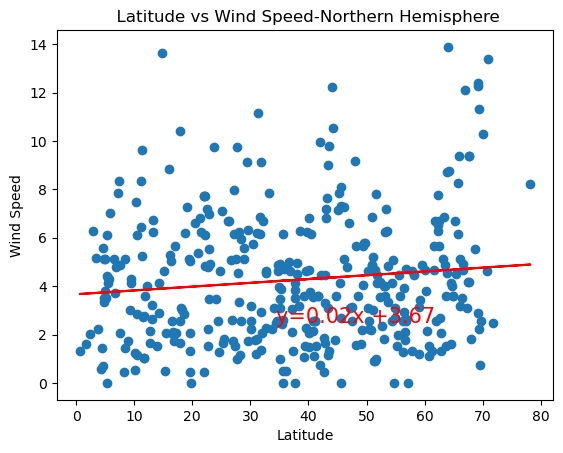

In [21]:
# Northern Hemisphere

linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"  Latitude vs Wind Speed-Northern Hemisphere ","Latitude","Wind Speed")
#x_values, y_values, title, x_label, y_label

The r-value is: 0.04743135987020973


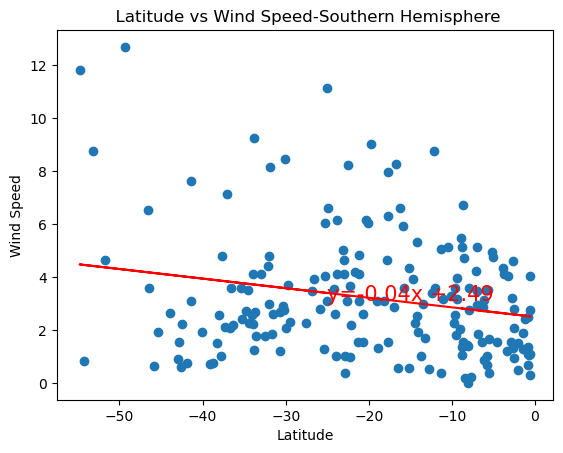

In [22]:
# Southern Hemisphere

linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"  Latitude vs Wind Speed-Southern Hemisphere ","Latitude","Wind Speed")
#x_values, y_values, title, x_label, y_label

**Discussion about the linear relationship:** Northern Hemisphere:There is no or very weak correlation between Latitude and WindSpeed

Southern Hemisphere:There is no or very weak correlation between Latitude and WindSpeed